In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import highlight_text 
from PIL import Image

In [2]:
df_2023 = pd.read_html('https://fbref.com/en/squads/1c781004/Norwich-City-Stats', attrs = {"id" : "matchlogs_for"})[0]
df_2022 = pd.read_html('https://fbref.com/en/squads/1c781004/2022-2023/Norwich-City-Stats', attrs = {"id" : "matchlogs_for"})[0]

In [3]:
df_position = pd.read_excel("C:\\Users\\George\\Documents\\Football Analytics\\Data\\Norwich_Position.xlsx")

In [4]:
df_position=df_position.T

In [5]:
df_position.columns = df_position.iloc[0]

In [6]:
df_position.drop(df_position.index[0], inplace=True)

In [7]:
df_position.rename(columns={'Norwich':'Position'}, inplace=True)
#df_position.rename(index={'Unnamed: 0	':'Round'}, inplace=True)

In [8]:
df_2023 = df_2023.merge(df_position, how='left', left_on='Round', right_on='Round')

In [9]:
df_2022 = df_2022.drop(range(0, 29))

In [10]:
df = pd.concat([df_2022, df_2023])

In [11]:
df.dropna(subset = ["xG"], inplace = True)

In [12]:
df['Match'] = range(1, 64)

In [13]:
df['xGSMA'] = df['xG'].rolling(window=10).mean()

In [14]:
df['xGASMA'] = df['xGA'].rolling(window=10).mean()

In [15]:
X = df['Match']
Y_for = df['xGSMA']
Y_ag = df['xGASMA']
Pos = df['Position']

In [16]:
#df_pos =  df.dropna(subset = ["Position"])

Text(51.27777777777777, 0.5, 'xG/xGA')

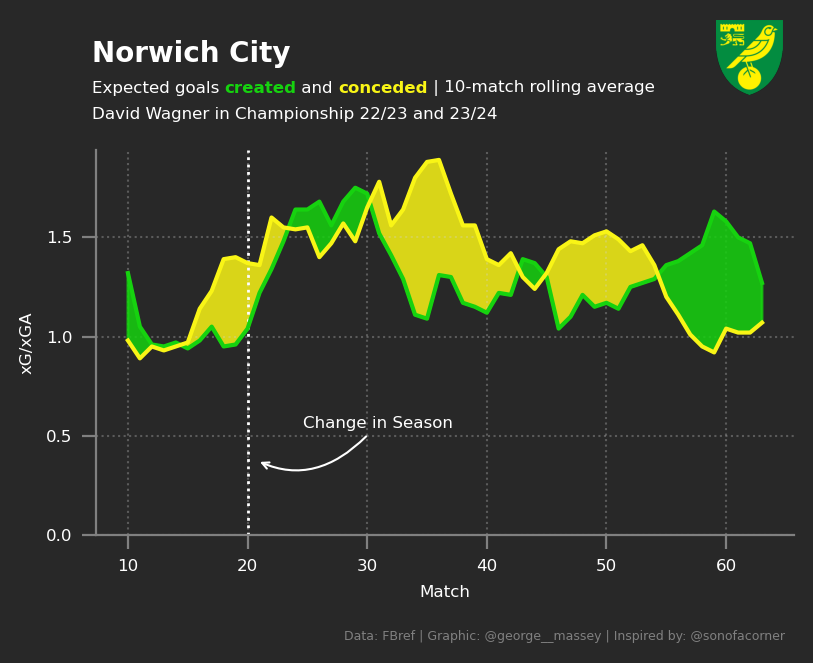

In [25]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#282828")
ax = plt.subplot(111, facecolor = "#282828")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    visible = True, 
    lw = 0.75,
    ls = ":",
    alpha = 0.3,
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "#16D20F", zorder = 4)
line_2 = ax.plot(X, Y_ag, color = "#F9F516", zorder = 4)

ax.set_ylim(0)
# Add a line to mark the division between seasons
ax.plot(
    [20,20], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1,
    color = "white",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (20, .4),
    xytext = (20, 10),
    textcoords = "offset points",
    text = "Change in Season",
    size = 6,
    color = "white",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="white", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)
# Fill between
ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_for >= Y_ag, 
    interpolate = True,
    alpha = 0.85,
    zorder = 3,
    color = line_1[0].get_color()
)

ax.fill_between(
    X, 
    Y_ag,
    Y_for, 
    where = Y_ag > Y_for, 
    interpolate = True,
    alpha = 0.85,
    color = line_2[0].get_color()
)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "white",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# Set y-axis major tick positions to only 0.5 xG multiples.
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
highlight_text.fig_text(
    x = 0.12, y = 1.1,
    s = "Norwich City",
    color = "white",
    weight = "bold",
    size = 10,
    #family = "DM Sans", #This is a custom font !!
    #annotationbbox_kw={"xycoords": "figure fraction"}
)

highlight_text.fig_text(
    x = 0.12, y = 1.02,
    s = "Expected goals <created> and <conceded> | 10-match rolling average\nDavid Wagner in Championship 22/23 and 23/24",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"},
        {"color": line_2[0].get_color(), "weight": "bold"}
    ],
    color = "white",
    size = 6,
    #annotationbbox_kw={"xycoords": "figure fraction"}
)
fig.text(0.4, -0.1, "Data: FBref | Graphic: @george__massey | Inspired by: @sonofacorner", size = 4.5, color = "grey")
badge_url = "C:/Users/George/Documents/Football Analytics/Team Logos/norwich city_logo.png"

logo_ax = fig.add_axes([0.75, .99, 0.2, 0.15], zorder=1)
club_icon = Image.open(badge_url)
logo_ax.imshow(club_icon)
logo_ax.axis("off")
ax.set_xlabel('Match', color = "white", fontsize = 6)
ax.set_ylabel('xG/xGA', color = "white", fontsize = 6)